In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# EV bought yearwise growth
df1 = pd.read_excel("/content/Copy of ev_growth_till_date(1).xlsx", sheet_name = "Sheet1")

# reviews of the customer for EV's
df2 = pd.read_csv("/content/ev_car_reviews.csv")

# State wise EV's running on the road
df3 = pd.read_excel("/content/state_wise_on_road_evs.xlsx", header = 1)

In [3]:
df1

,year,2W,3W,4w,GV,PS
0,2018,17067,110133,1047,658,50
1,2019,30389,133489,962,54,508
2,2020,29113,90385,3207,15,88
3,2021,156243,158129,12259,1118,1177
4,2022,631181,350247,33205,653,1972
5,2023,489637,300114,40186,1512,985


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    6 non-null      int64
 1   2W      6 non-null      int64
 2   3W      6 non-null      int64
 3   4w      6 non-null      int64
 4   GV      6 non-null      int64
 5   PS      6 non-null      int64
dtypes: int64(6)
memory usage: 416.0 bytes


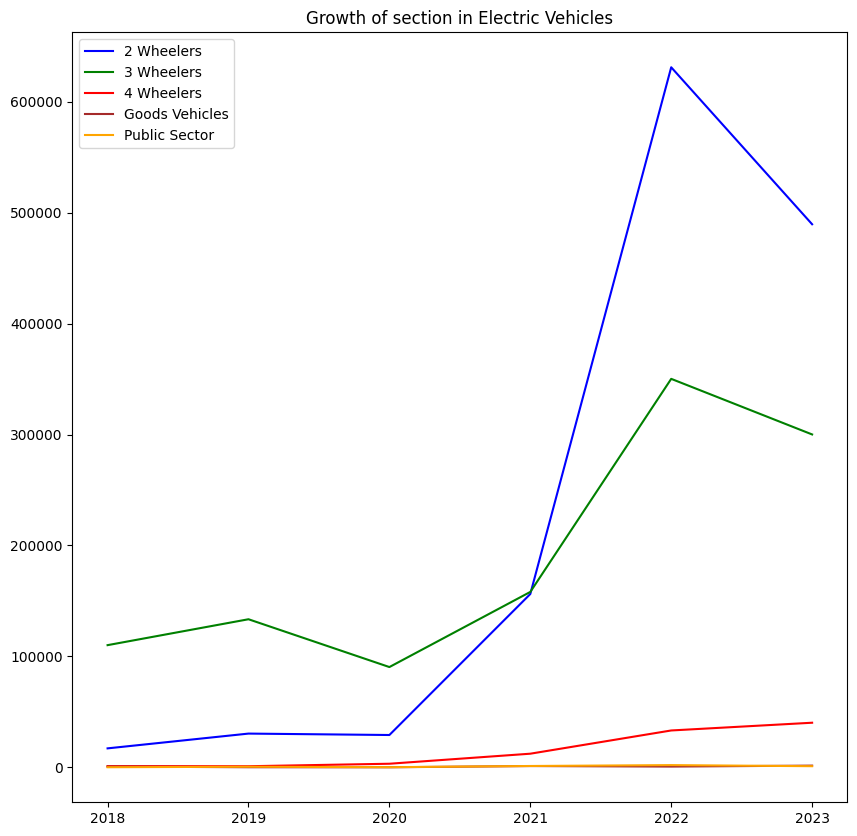

In [5]:
plt.figure(figsize = (10,10))
plt.plot(df1["year"],df1["2W"], color = "Blue")
plt.plot(df1["year"],df1["3W"], color = "Green")
plt.plot(df1["year"],df1["4w"], color = "Red")
plt.plot(df1["year"],df1["GV"], color = "Brown")
plt.plot(df1["year"],df1["PS"], color = "Orange")
plt.legend(["2 Wheelers",
            "3 Wheelers",
            "4 Wheelers",
            "Goods Vehicles",
            "Public Sector"])
plt.title("Growth of section in Electric Vehicles")
plt.show();

In [6]:
df3.head()

,Sl. No,State name,Till date State wise - total vehicle registered as Electric
0,1,Andaman & Nicobar Island,186
1,2,Andhra Pradesh,"66,500"
2,3,Arunachal Pradesh,25
3,4,Assam,"1,16,605"
4,5,Bihar,"1,55,457"


In [7]:
df3.drop("Sl. No", axis = 1,  inplace = True)

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   State name                                                   35 non-null     object
 1   Till date State wise - total vehicle registered as Electric  35 non-null     object
dtypes: object(2)
memory usage: 688.0+ bytes


In [9]:
df3.rename(columns = {'Till date State wise - total vehicle registered as Electric':'T. Vehicles'}, inplace = True)

In [10]:
df3["T. Vehicles"] = (df3["T. Vehicles"].str.replace(',', '')).astype("int64")

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State name   35 non-null     object
 1   T. Vehicles  35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 688.0+ bytes


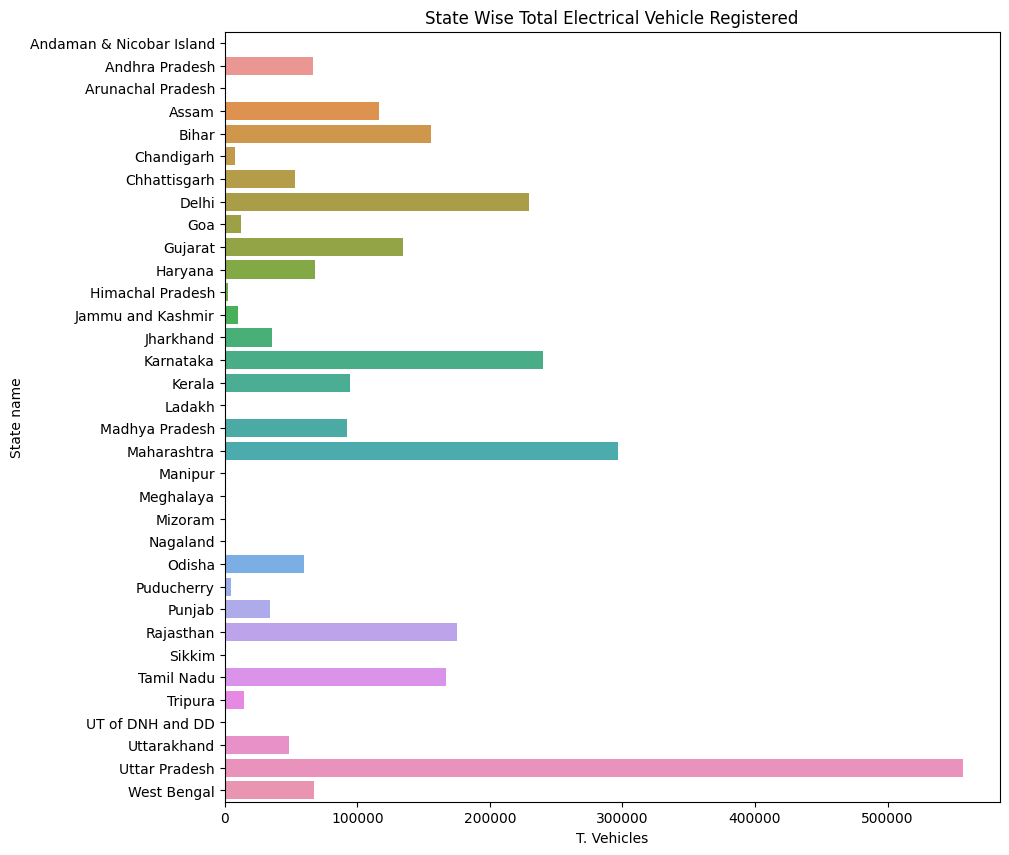

In [12]:
plt.figure(figsize = (10,10))
sns.barplot(data = df3.iloc[:-1, :], y = "State name", x = "T. Vehicles")
plt.title("State Wise Total Electrical Vehicle Registered")
plt.show();

In [13]:
df4 = pd.read_csv("/content/ev_charger.csv")
df4.head()

,Unnamed: 0,Region,2W,3W,4W,Bus,Chargers
0,0,Uttar Pradesh,9852,42881,458,197,207.0
1,1,Maharastra,38558,893,1895,186,317.0
2,2,Karnataka,32844,568,589,57,172.0
3,3,Tamil Nadu,25642,396,426,0,256.0
4,4,Gujarat,22359,254,423,22,228.0


In [14]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24 non-null     int64  
 1   Region      24 non-null     object 
 2   2W          24 non-null     int64  
 3   3W          24 non-null     int64  
 4   4W          24 non-null     int64  
 5   Bus         24 non-null     int64  
 6   Chargers    23 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.4+ KB


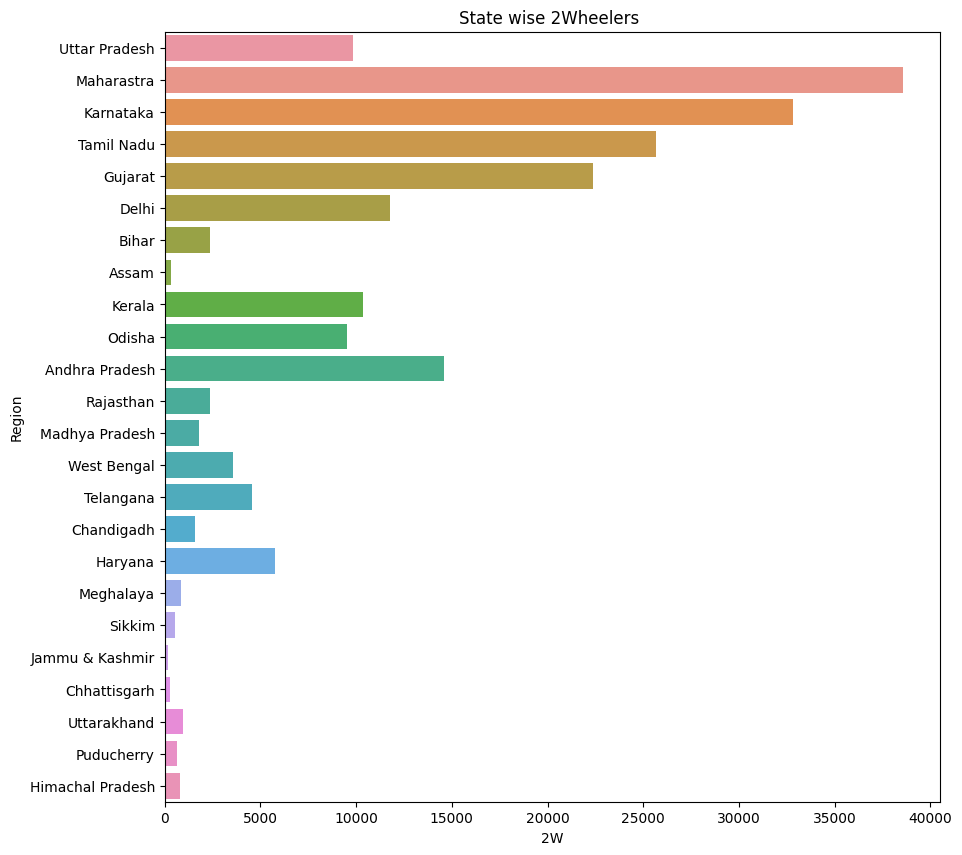

In [15]:
# state wise 2Wheelers
plt.figure(figsize = (10,10))
sns.barplot(data = df4, y = "Region", x = "2W")
plt.title("State wise 2Wheelers ")
plt.show();

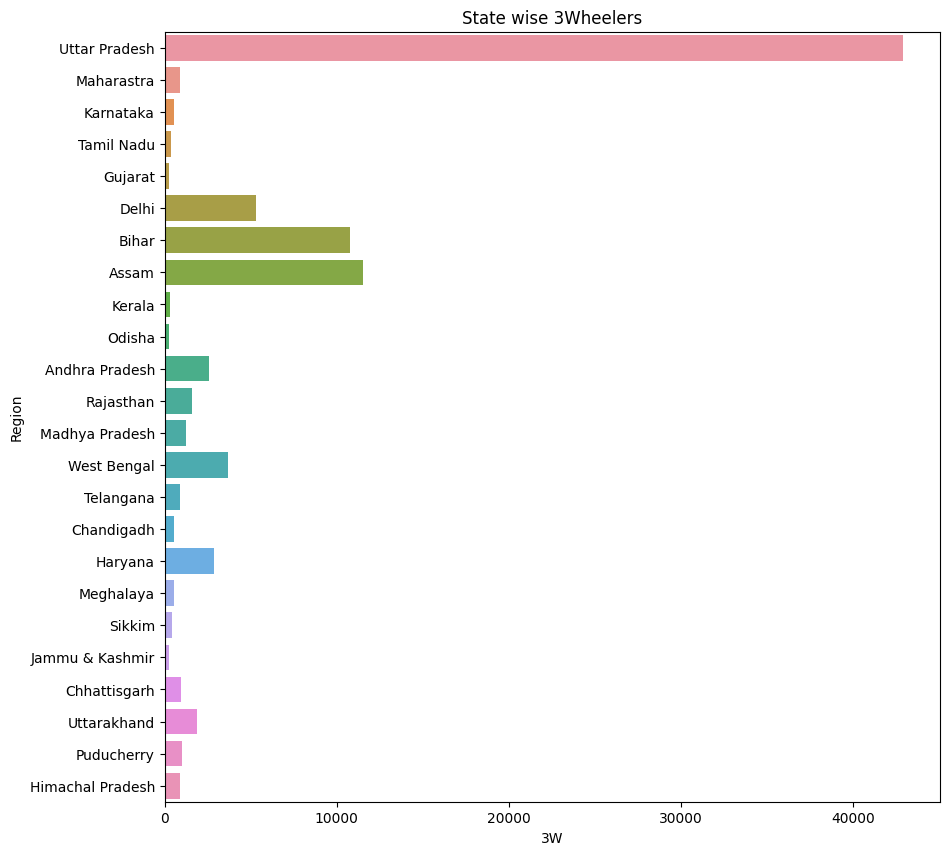

In [16]:
# state wise 3Wheelers
plt.figure(figsize = (10,10))
sns.barplot(data = df4, y = "Region", x = "3W")

plt.title("State wise 3Wheelers")
plt.show();

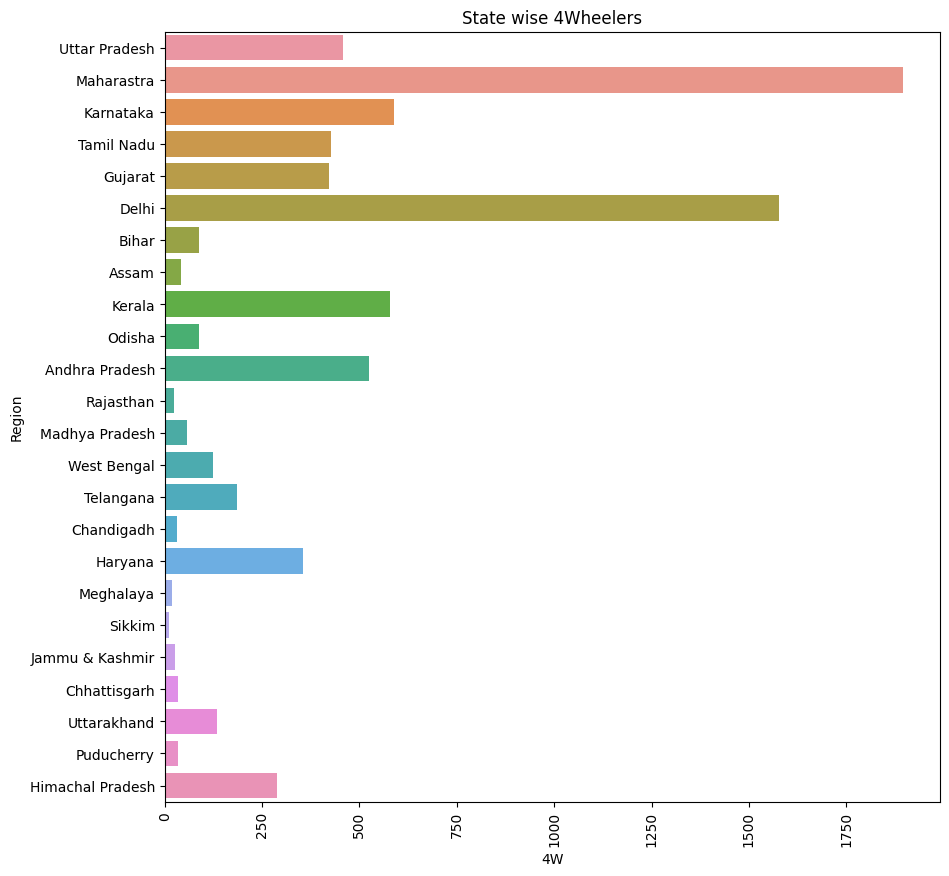

In [17]:
# state wise 4Wheelers
plt.figure(figsize = (10,10))
sns.barplot(data = df4, y = "Region", x = "4W")
plt.xticks(rotation = 90)
plt.title("State wise 4Wheelers")
plt.show();

In [18]:
df6 = pd.read_csv("/content/charging_stations_in_india.csv")
df6.head()

,S. No.,State Name,No. of Operational PCS
0,1,Andaman & Nicobar,3
1,2,Andhra Pradesh,222
2,3,Arunachal Pradesh,9
3,4,Assam,48
4,5,Bihar,83


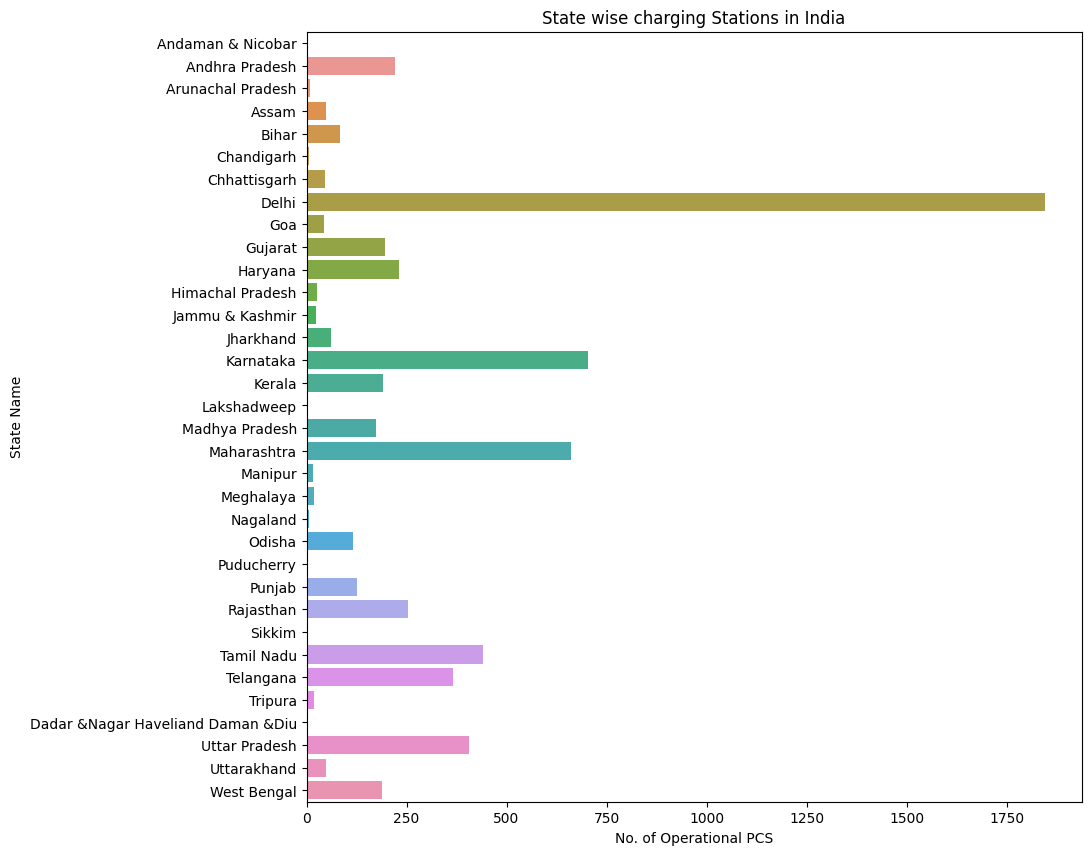

In [19]:
# state wise charging stations in India
plt.figure(figsize = (10,10))
sns.barplot(data = df6, y = "State Name", x = "No. of Operational PCS")
plt.title("State wise charging Stations in India")
plt.show();

In [25]:
df5 = pd.read_excel("/content/3_ev_market_india_dataset (1).xlsx")
df5.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [26]:
df5.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [27]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [29]:
df5["Brand"].value_counts()

Tesla         13
Audi           9
Nissan         8
Volkswagen     8
Skoda          6
Renault        5
Porsche        5
Kia            5
BMW            4
Ford           4
Smart          3
Byton          3
Mercedes       3
Hyundai        3
Opel           3
Fiat           2
Peugeot        2
Honda          2
Mini           1
DS             1
Polestar       1
Sono           1
Lucid          1
Jaguar         1
Citroen        1
Aiways         1
MG             1
Lightyear      1
SEAT           1
CUPRA          1
Lexus          1
Mazda          1
Volvo          1
Name: Brand, dtype: int64

# Analysis of EV Based on Brand

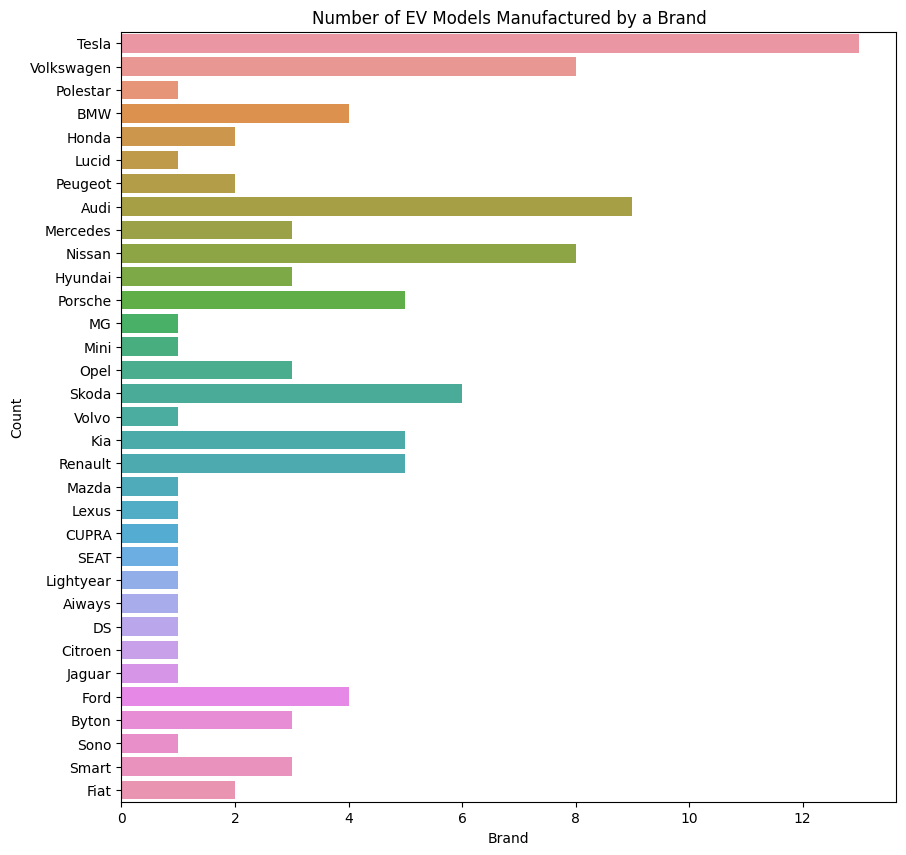

In [84]:
# brand-wise count of EV models
plt.figure(figsize = (10,10))
sns.countplot(data=df5, y='Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of EV Models Manufactured by a Brand')
plt.show()

## Different body types of EV

In [62]:
df5["BodyStyle"].value_counts().keys()

Index(['SUV', 'Hatchback', 'Sedan', 'Liftback', 'Pickup', 'Cabrio', 'SPV',
       'MPV', 'Station'],
      dtype='object')

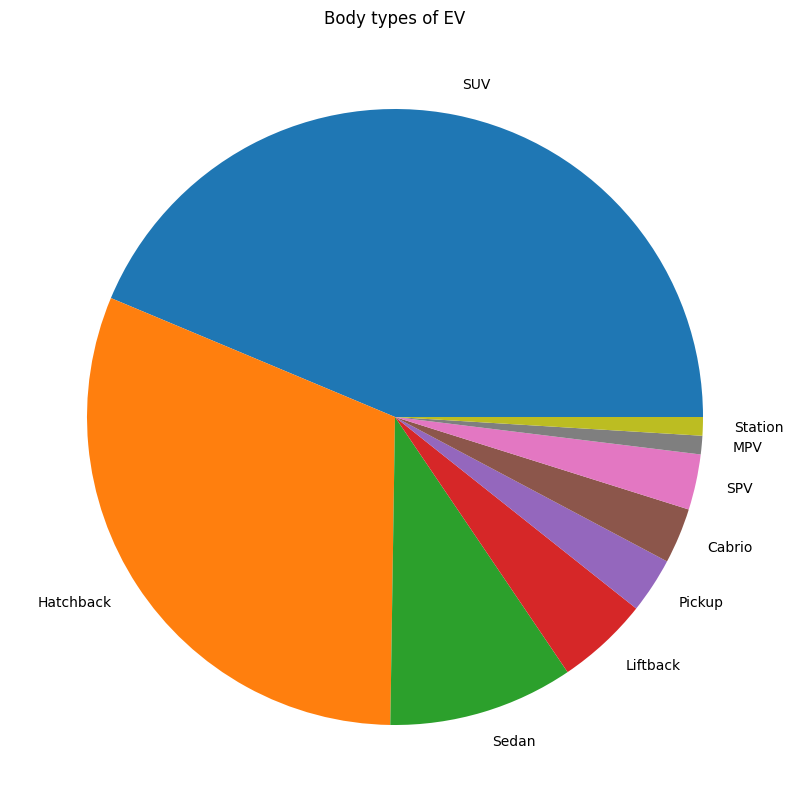

In [63]:
# different body types EVs visualization
plt.figure(figsize = (10,10))
plt.pie(df5["BodyStyle"].value_counts(), labels = df5["BodyStyle"].value_counts().keys())
plt.title("Body types of EV")
plt.show();

## Analysis of Number of Seats in India

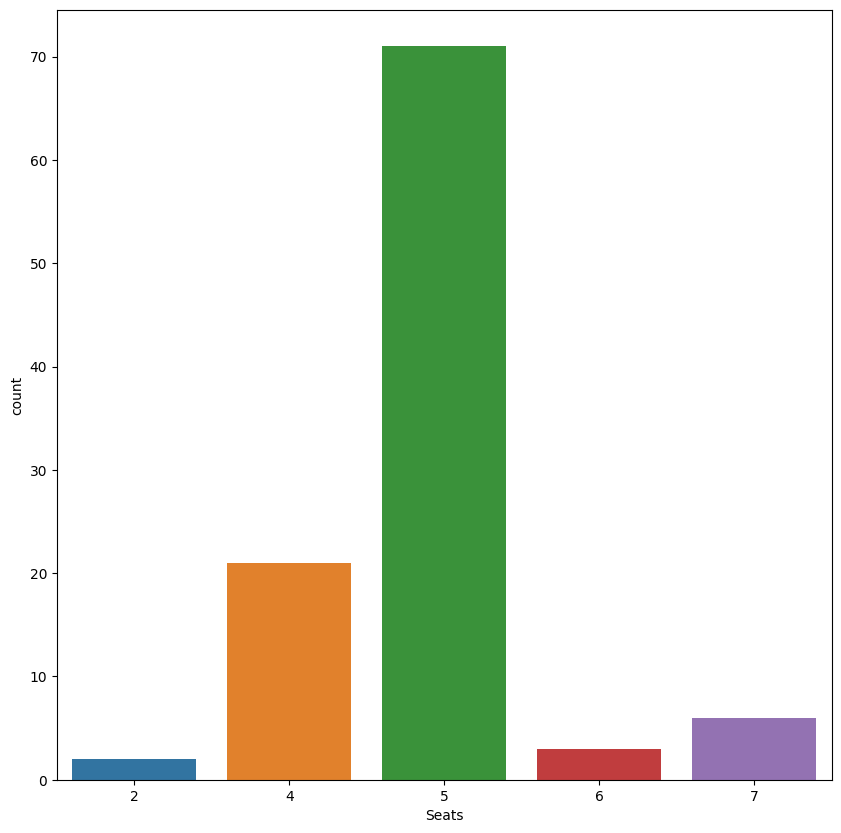

In [45]:
plt.figure(figsize = (10,10))
sns.countplot(data=df5, x='Seats')
plt.show();

##brand-wise analysis of the number of seats

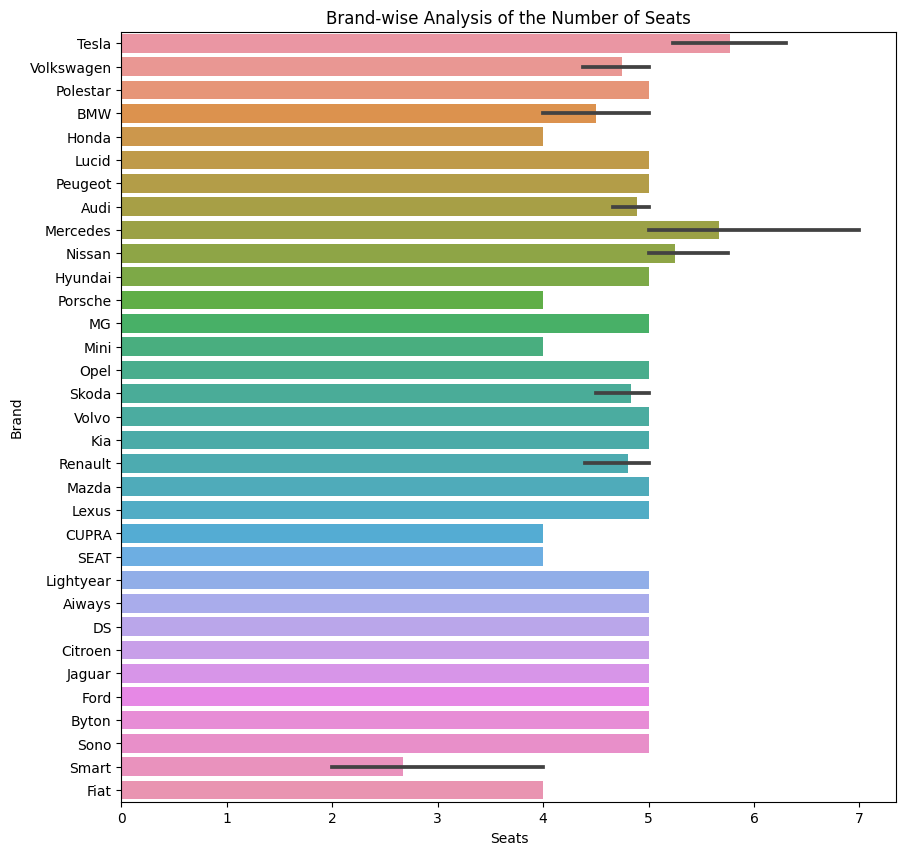

In [80]:
#brand-wise analysis of the number of seats
plt.figure(figsize = (10,10))
sns.barplot( data=df5, y='Brand', x='Seats')
plt.title('Brand-wise Analysis of the Number of Seats')
plt.show();

## Available Plug-Type in India

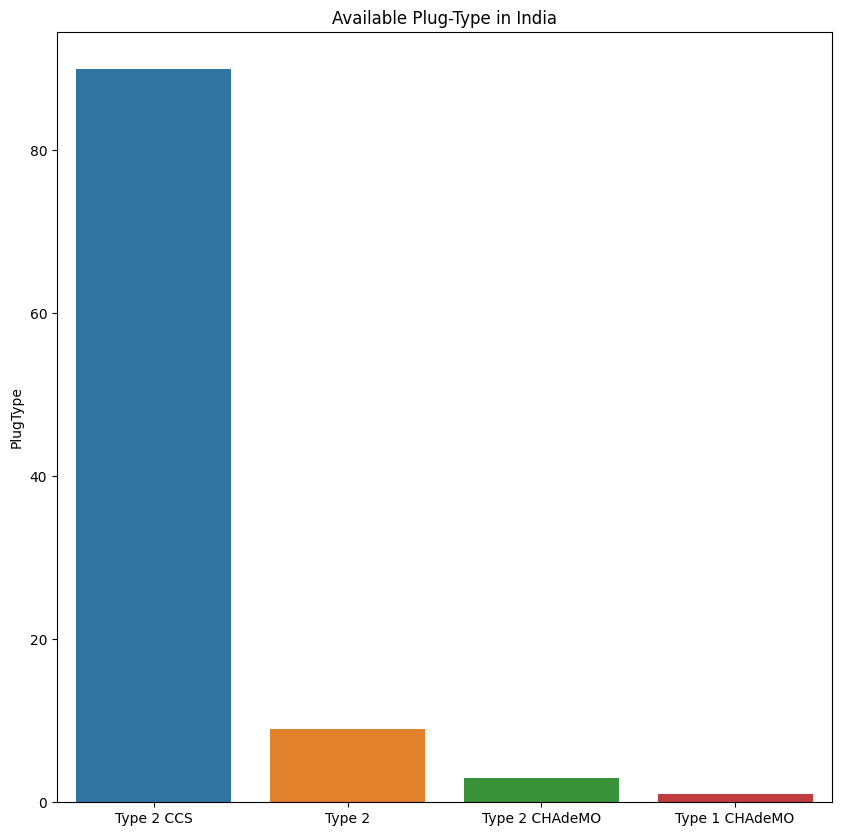

In [69]:
plt.figure(figsize = (10,10))
sns.barplot(x = df5["PlugType"].value_counts().keys(), y = df5["PlugType"].value_counts())
plt.title("Available Plug-Type in India")
plt.show();



##price comparison

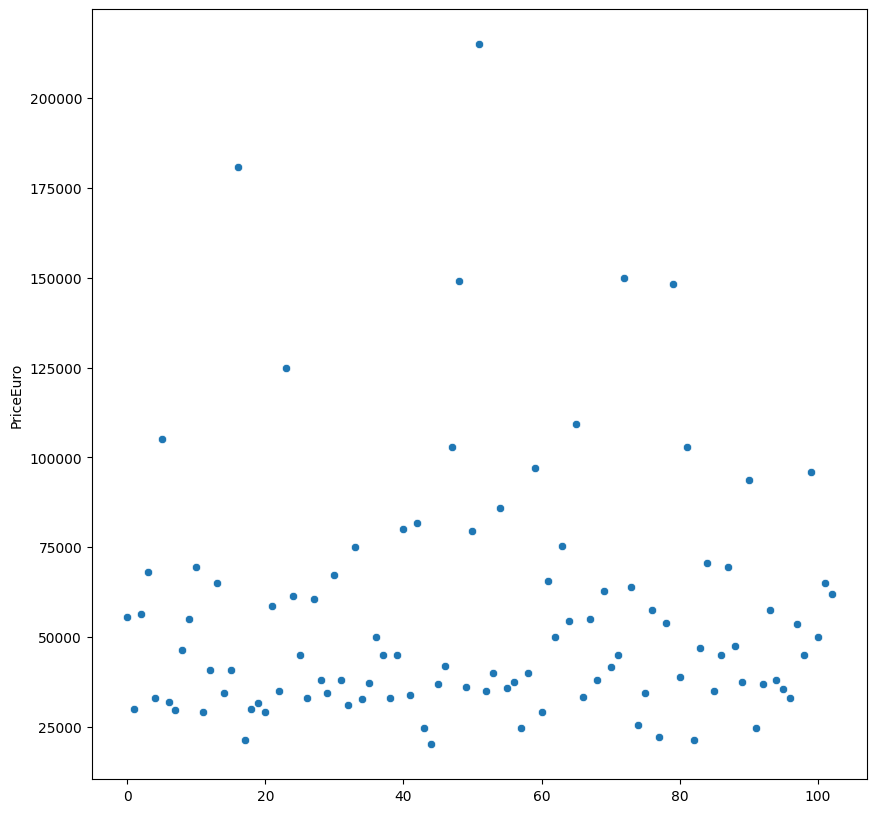

In [90]:
plt.figure(figsize = (10,10))
sns.scatterplot(df5["PriceEuro"])
plt.show();

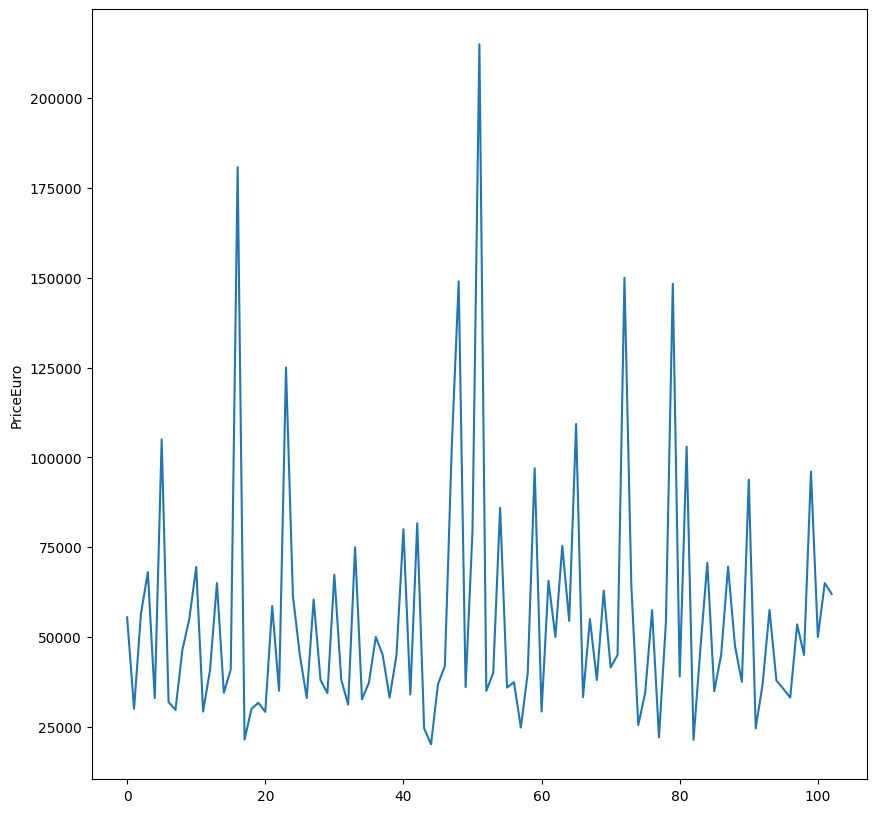

In [71]:
plt.figure(figsize = (10,10))
sns.lineplot(df5["PriceEuro"])
plt.show();

## Acceleration

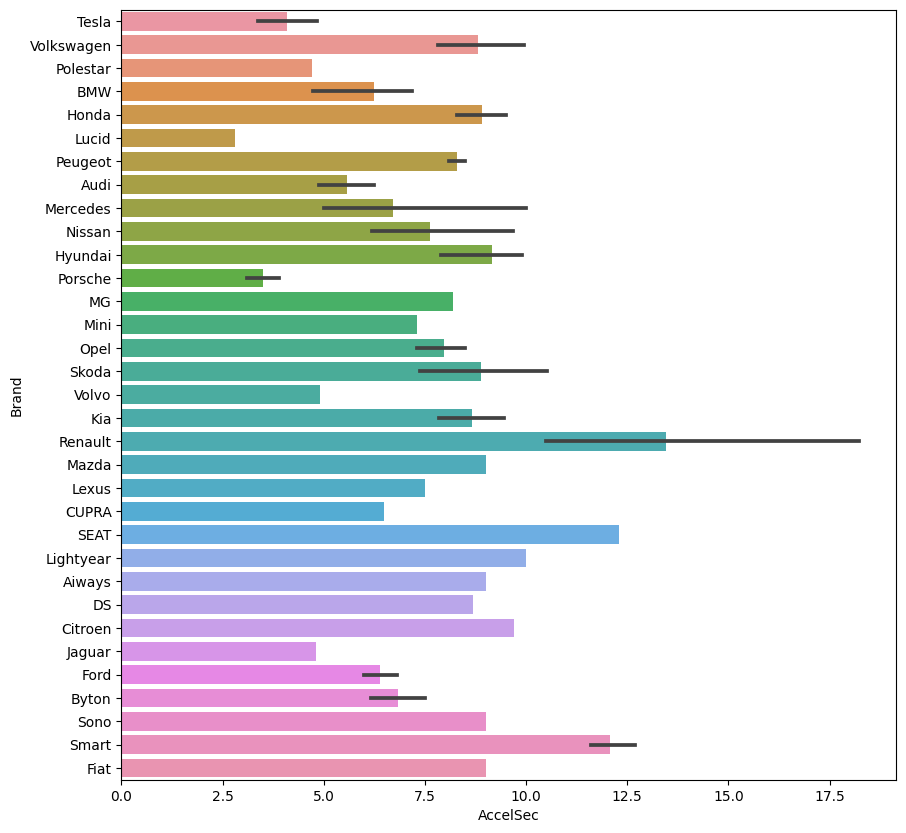

In [73]:
plt.figure(figsize = (10,10))
sns.barplot(data=df5, y='Brand', x='AccelSec')
plt.show();

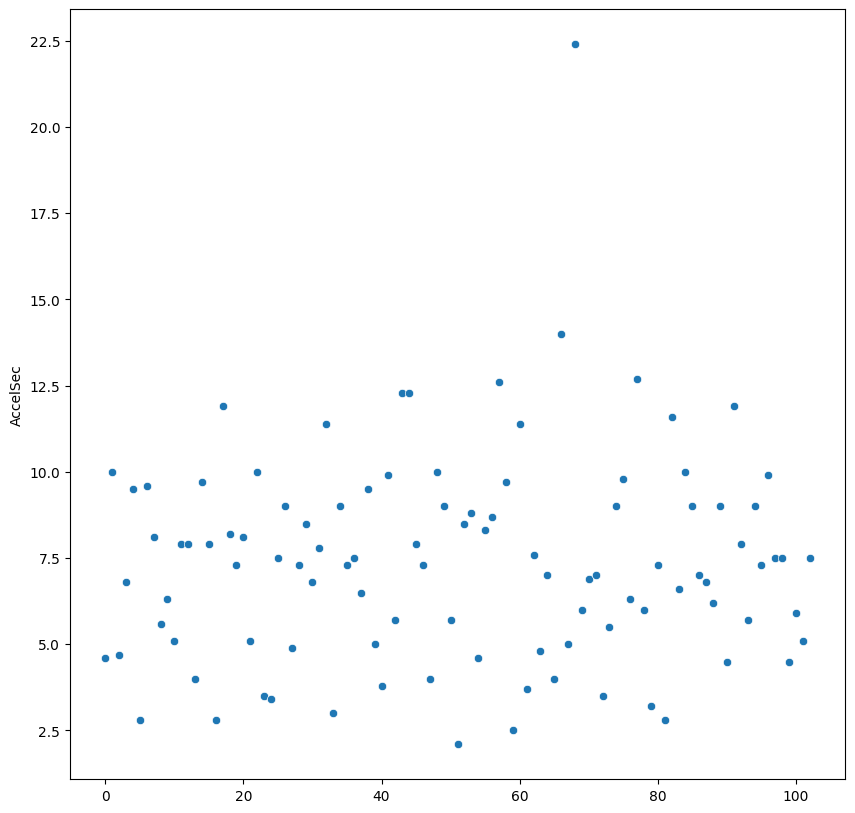

In [88]:
plt.figure(figsize = (10,10))
sns.scatterplot(df5['AccelSec'])
plt.show();

##SPEED

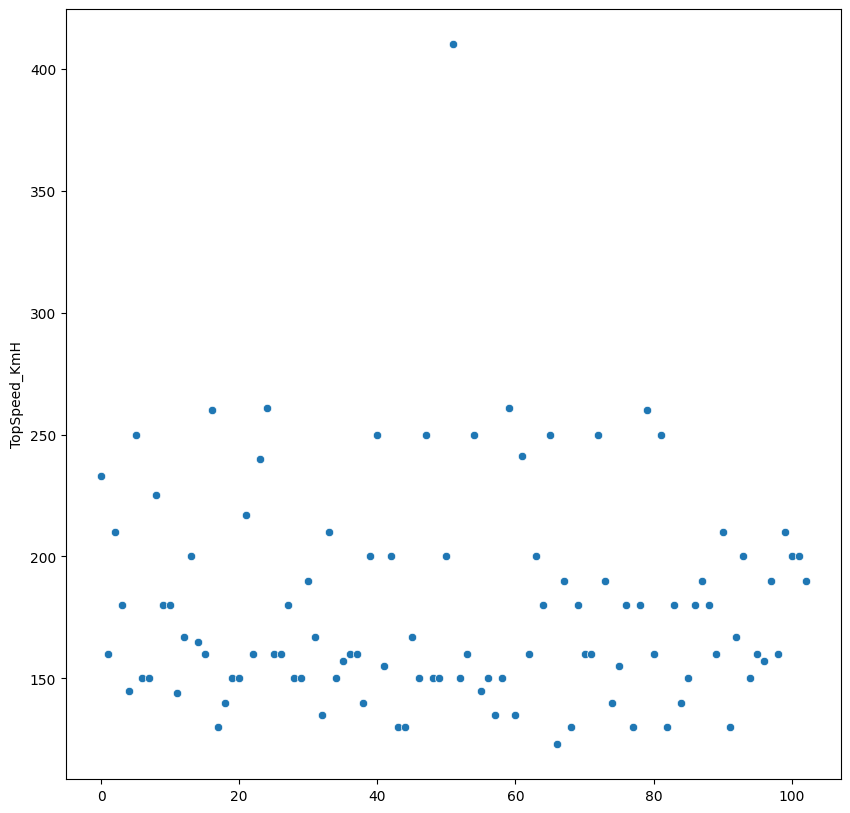

In [94]:
plt.figure(figsize = (10,10))
sns.scatterplot(df5['TopSpeed_KmH'])
plt.show();

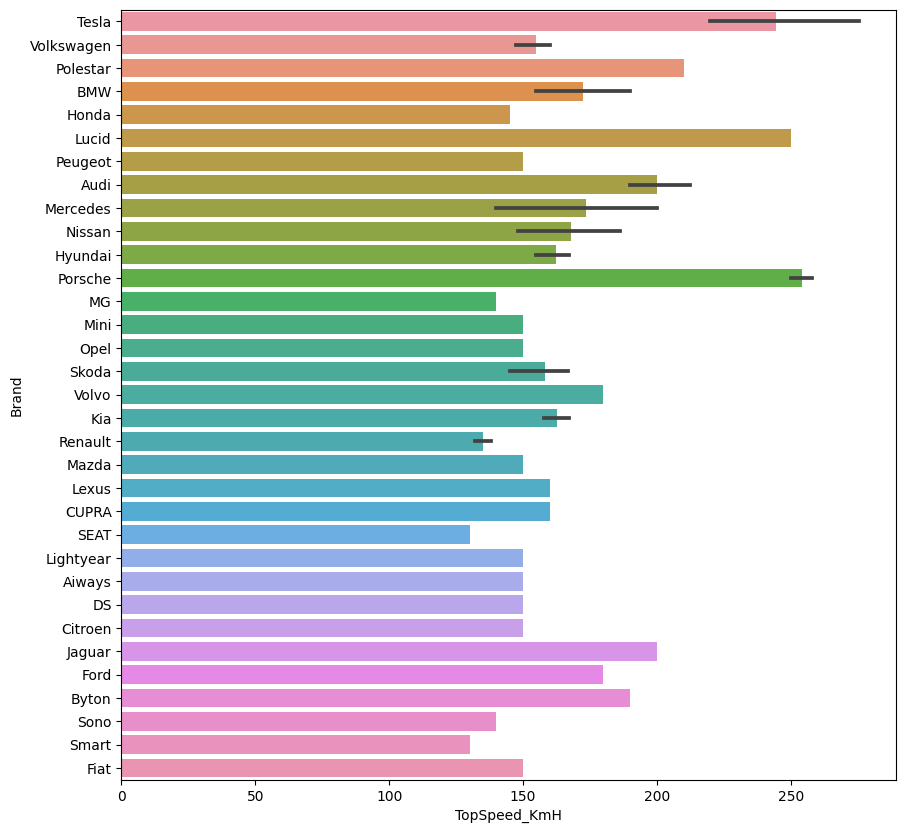

In [77]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df5, x='TopSpeed_KmH', y='Brand')
plt.show();

## Range

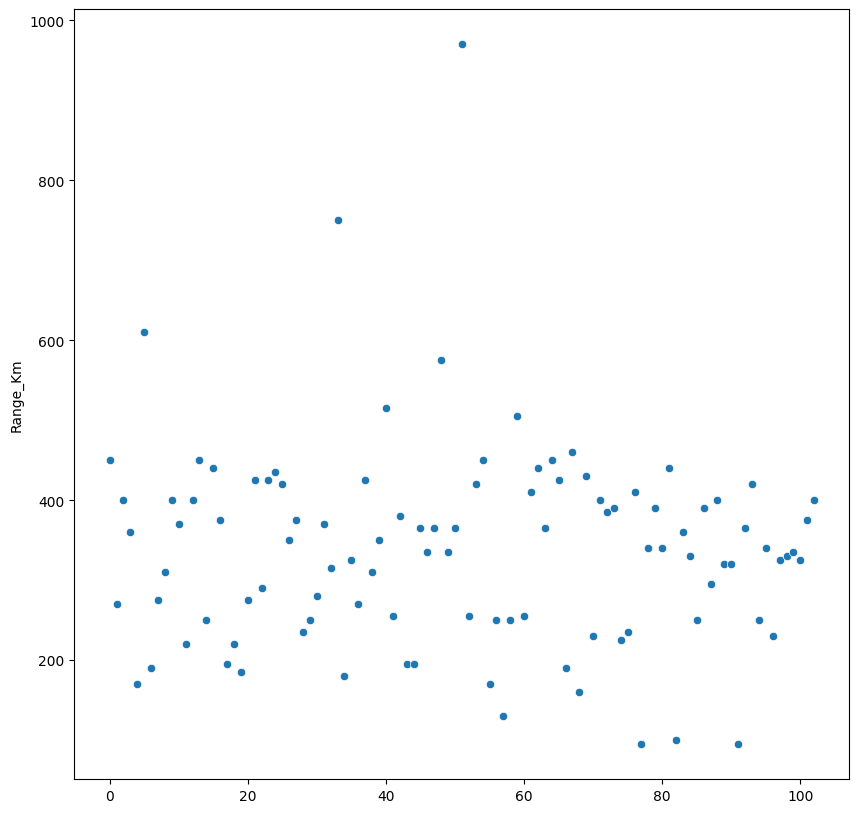

In [91]:
plt.figure(figsize = (10,10))
sns.scatterplot(df5["Range_Km"])
plt.show();

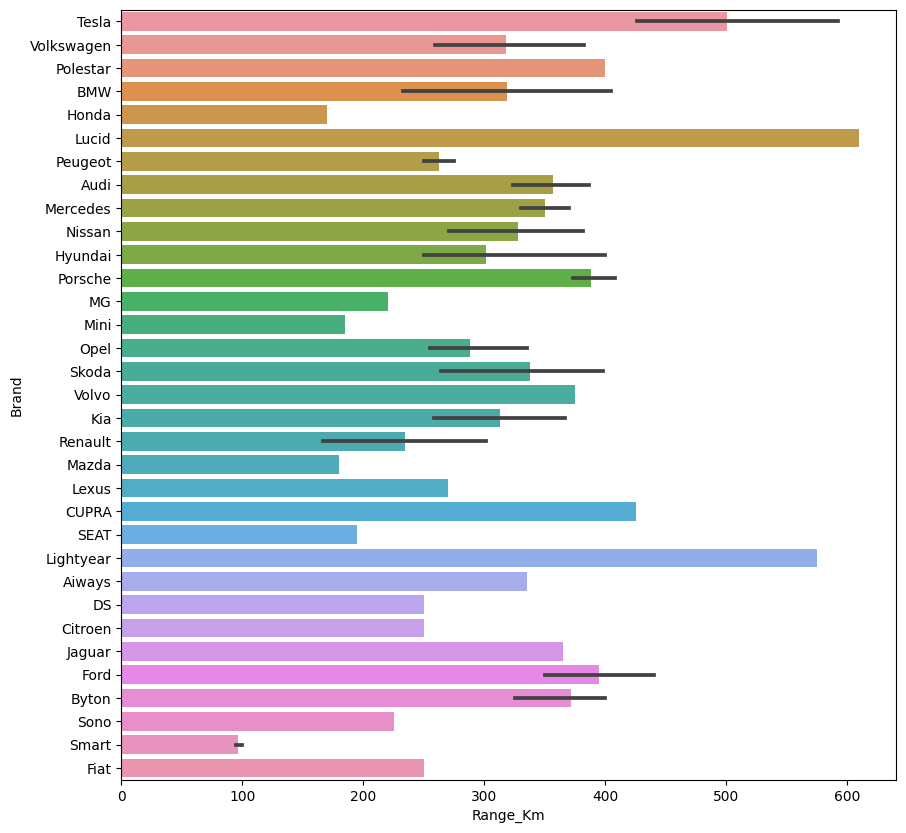

In [79]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df5, x='Range_Km', y='Brand')
plt.show();

## Efficiency

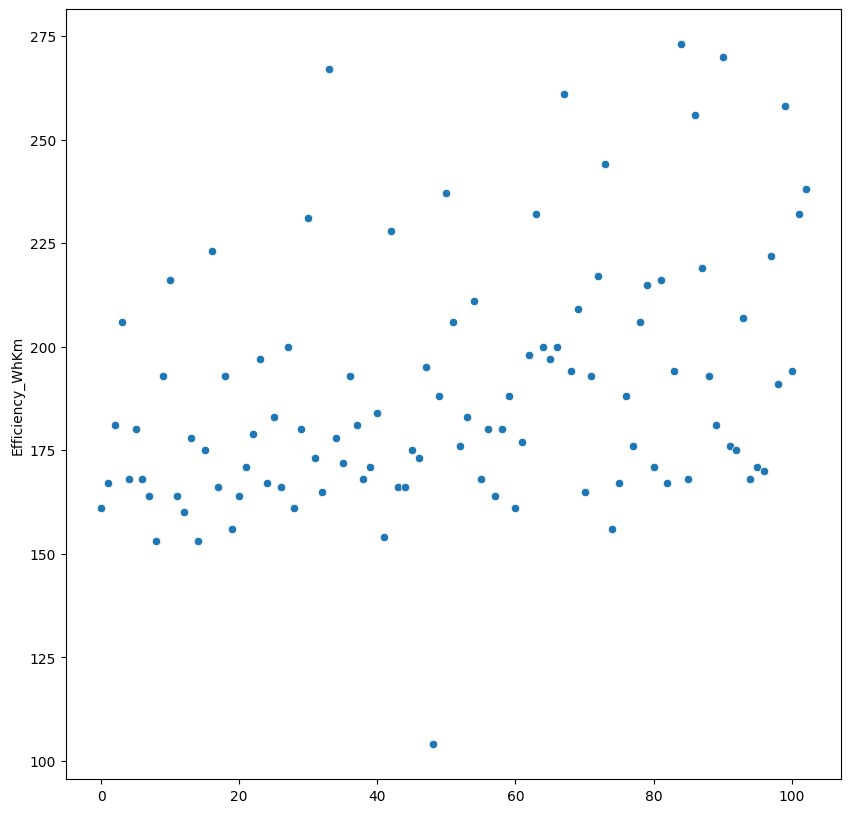

In [96]:
plt.figure(figsize = (10,10))
sns.scatterplot(df5["Efficiency_WhKm"])
plt.show();

In [21]:
df2.head()

,Title,reviews,Looks,comfort,performance,fuel_eco,vfm
0,Fan of tata nexon ev,I haven't buy this vehicle but I have watched ...,5,5,5,5,5
1,Awesome best car,"The process was quick and the car is amazing, ...",5,5,5,5,5
2,Tata Nexon EV,Real power on the same second acceleration giv...,5,5,5,5,3
3,Crazy car,It is a hatchback car but also it gives me a n...,5,5,5,5,5
4,Range is low,after full night 100 present charge its showin...,4,3,1,1,1


In [85]:
df2.describe()

,Looks,comfort,performance,fuel_eco,vfm
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.560000,4.380000,4.370000,4.320000,3.880000
std,0.832666,0.951129,1.268539,1.196628,1.423327
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,3.000000
50%,5.000000,5.000000,5.000000,5.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [86]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        100 non-null    object
 1   reviews      100 non-null    object
 2   Looks        100 non-null    int64 
 3   comfort      100 non-null    int64 
 4   performance  100 non-null    int64 
 5   fuel_eco     100 non-null    int64 
 6   vfm          100 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 5.6+ KB


## Labeling the Reviews positive, neutral or Negative

In [107]:
df2['label'] = ''
for i,x in df2.reviews.iteritems():
    label = TextBlob(x)
    df2['label'][i] = label.sentiment.polarity
    print("Index: ", i ,  "label" , label.sentiment.polarity)

Index:  0 label 0.85
Index:  1 label 0.5583333333333333
Index:  2 label 0.13214285714285715
Index:  3 label 0.3
Index:  4 label 0.17500000000000002
Index:  5 label 0.3746031746031746
Index:  6 label 0.6619999999999999
Index:  7 label 0.03402597402597403
Index:  8 label 0.5458333333333334
Index:  9 label 0.23194444444444443
Index:  10 label 0.0
Index:  11 label 0.35833333333333334
Index:  12 label 0.6071428571428571
Index:  13 label 0.17615384615384616
Index:  14 label 0.3666666666666667
Index:  15 label 0.13525641025641025
Index:  16 label 0.7142857142857143
Index:  17 label 0.4
Index:  18 label 0.18939393939393945
Index:  19 label 0.35833333333333334
Index:  20 label 0.28712121212121205
Index:  21 label 0.325
Index:  22 label 0.4666666666666667
Index:  23 label 0.3992727272727272
Index:  24 label 0.7333333333333334
Index:  25 label 0.1618181818181818
Index:  26 label -0.1375
Index:  27 label -0.0638888888888889
Index:  28 label -0.10524691358024692
Index:  29 label 0.9099999999999999


In [110]:
def polarity_to_label(x):
    if(x >= -1 and x < 0):
        return 0
    if(x == 0):
        return 1
    if(x > 0 and x <= 1):
        return 2
df2.label = df2.label.apply(polarity_to_label)

In [111]:
df2.head()

,Title,reviews,Looks,comfort,performance,fuel_eco,vfm,label
0,Fan of tata nexon ev,I haven't buy this vehicle but I have watched ...,5,5,5,5,5,2
1,Awesome best car,"The process was quick and the car is amazing, ...",5,5,5,5,5,2
2,Tata Nexon EV,Real power on the same second acceleration giv...,5,5,5,5,3,2
3,Crazy car,It is a hatchback car but also it gives me a n...,5,5,5,5,5,2
4,Range is low,after full night 100 present charge its showin...,4,3,1,1,1,2


# Looks

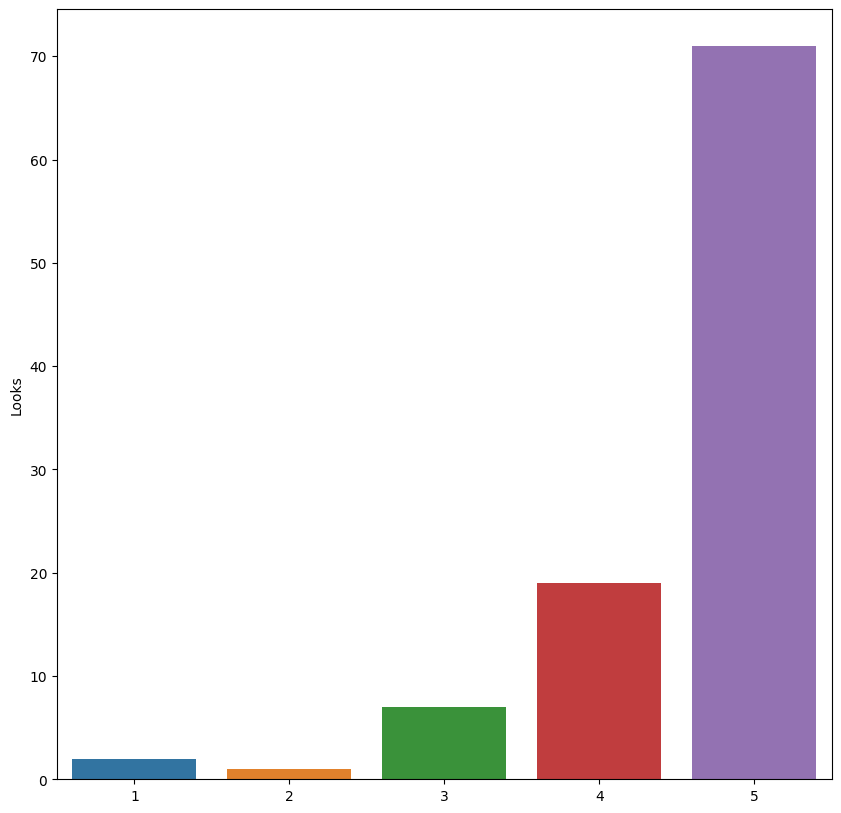

In [118]:
plt.figure(figsize = (10,10))
sns.barplot(data = df2, x = df2["Looks"].value_counts().keys(), y = df2["Looks"].value_counts())
plt.show();

# Comfort

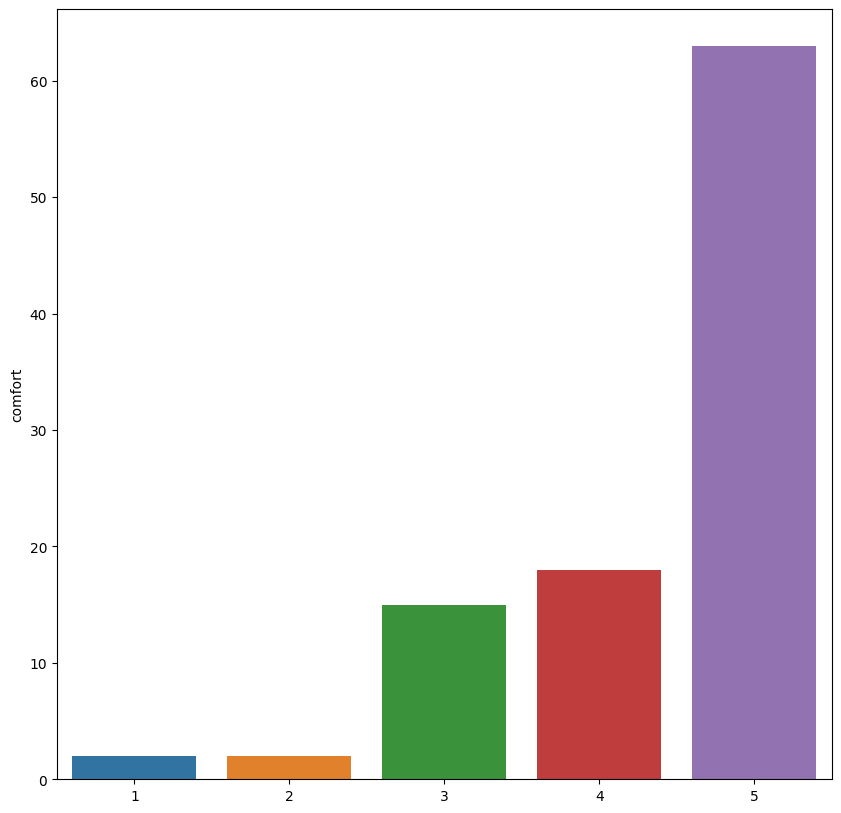

In [120]:
plt.figure(figsize = (10,10))
sns.barplot(data = df2, x = df2["comfort"].value_counts().keys(), y = df2["comfort"].value_counts())
plt.show();

# Performance

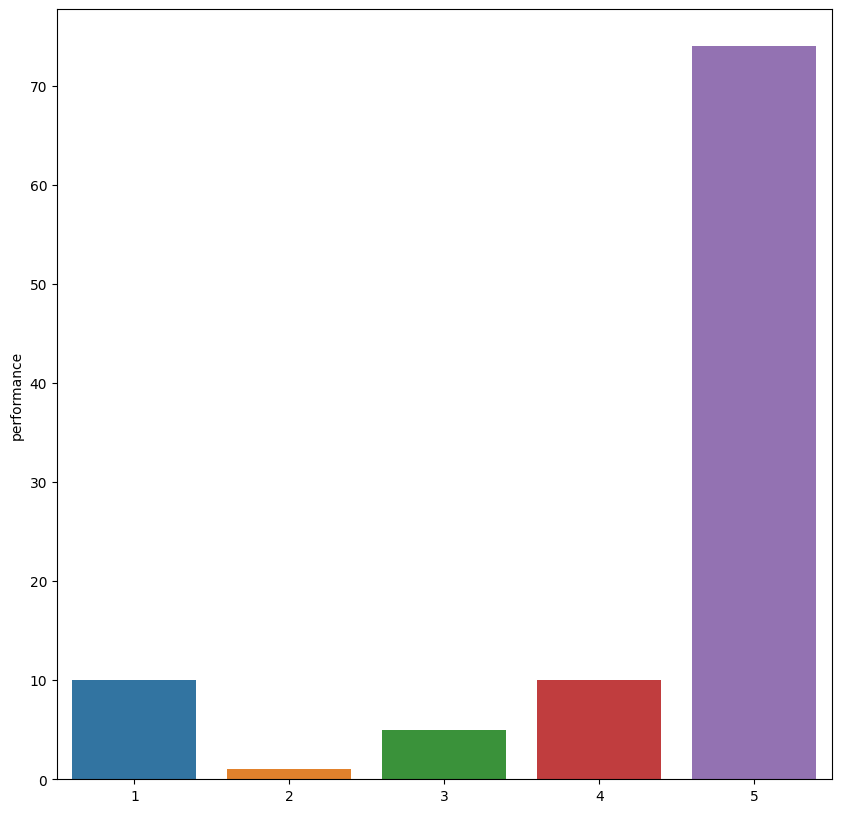

In [122]:
plt.figure(figsize = (10,10))
sns.barplot(data = df2, x = df2["performance"].value_counts().keys(), y = df2["performance"].value_counts())
plt.show();

#fuel_economy

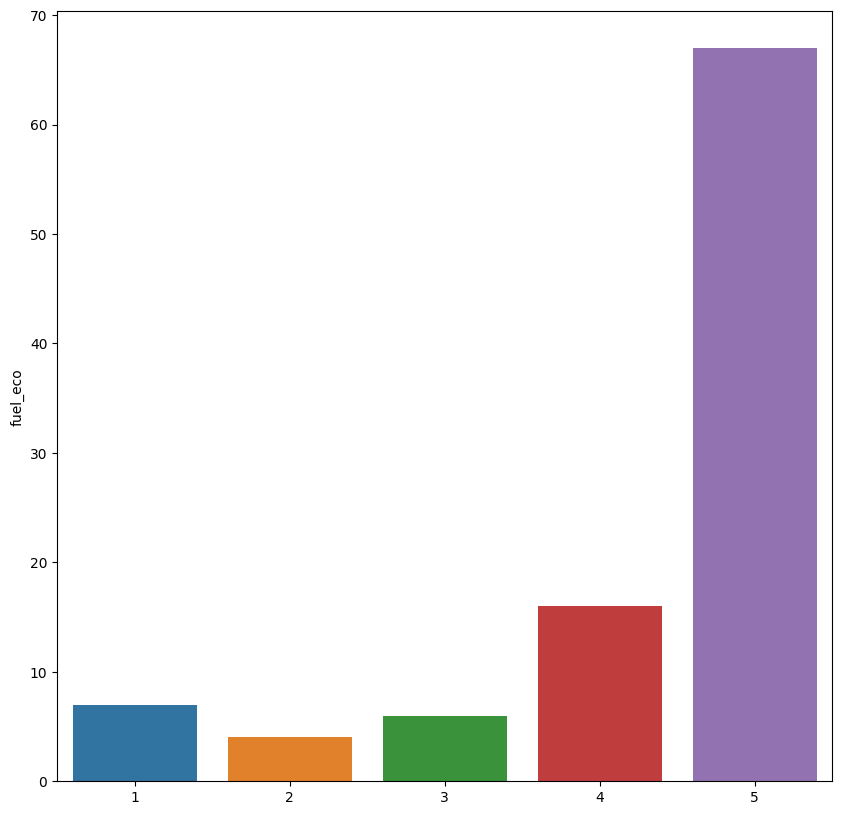

In [123]:
plt.figure(figsize = (10,10))
sns.barplot(data = df2, x = df2["fuel_eco"].value_counts().keys(), y = df2["fuel_eco"].value_counts())
plt.show();

# Value for Money

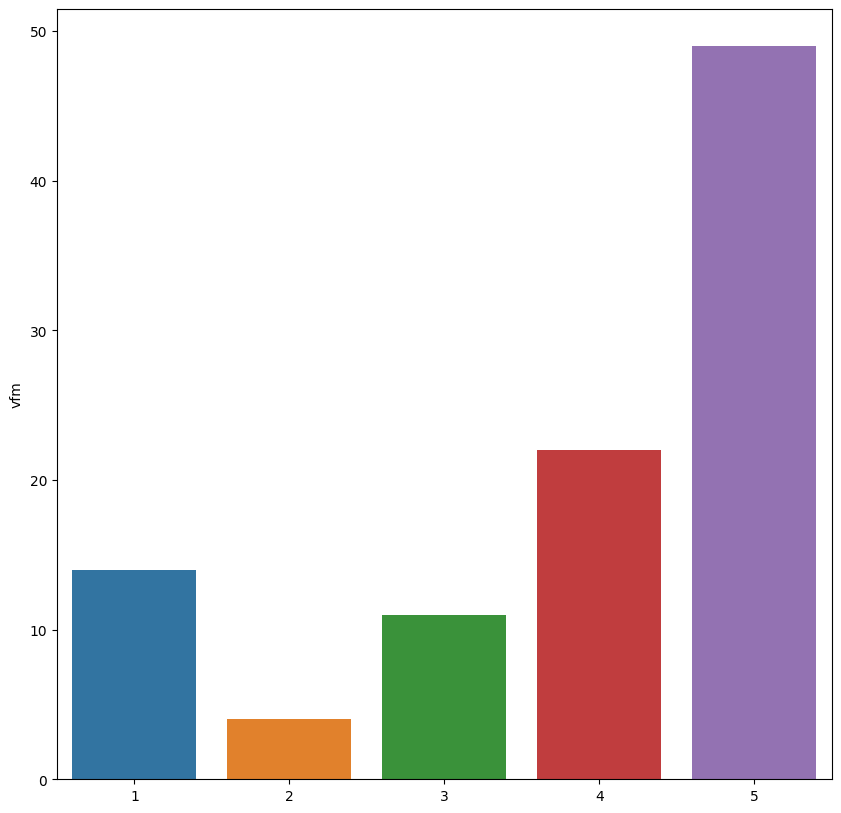

In [125]:
plt.figure(figsize = (10,10))
sns.barplot(data = df2, x = df2["vfm"].value_counts().keys(), y = df2["vfm"].value_counts())
plt.show();

# Review Labels

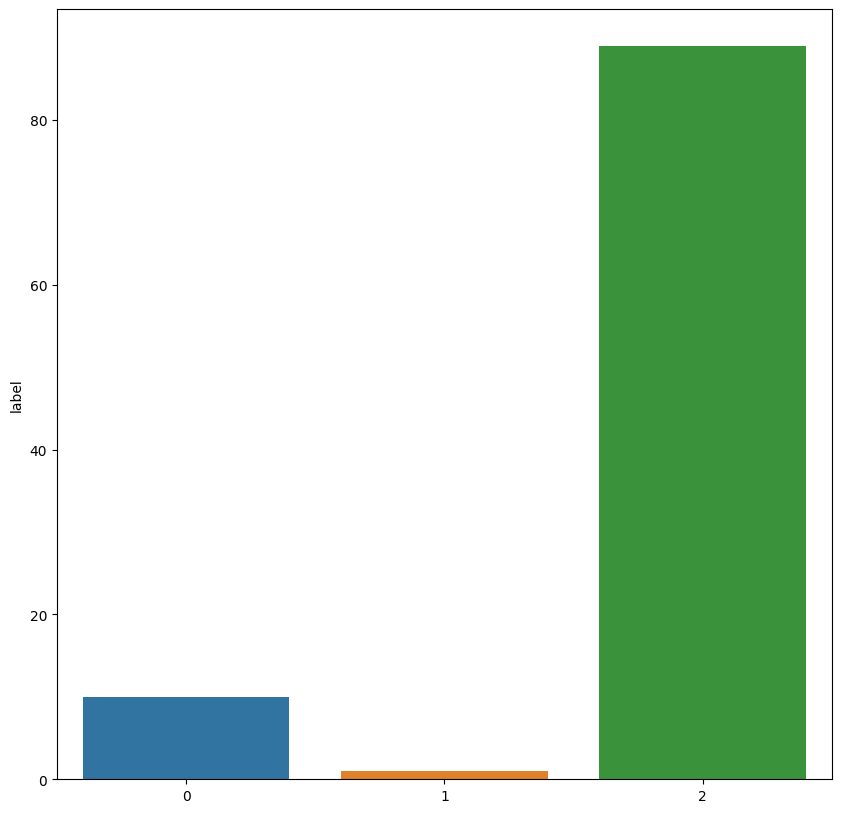

In [126]:
plt.figure(figsize = (10,10))
sns.barplot(data = df2, x = df2["label"].value_counts().keys(), y = df2["label"].value_counts())
plt.show();

# SEGMENTATION

## Kmeans-clustering

In [128]:
df = df2.iloc[:, 2:8]

In [130]:
df.head()

,Looks,comfort,performance,fuel_eco,vfm,label
0,5,5,5,5,5,2
1,5,5,5,5,5,2
2,5,5,5,5,3,2
3,5,5,5,5,5,2
4,4,3,1,1,1,2


###scaling

In [133]:
ss = StandardScaler()
df[list(df.columns)] = ss.fit_transform(df[list(df.columns)])

In [134]:
df.head()

,Looks,comfort,performance,fuel_eco,vfm,label
0,0.531085,0.655141,0.499136,0.571126,0.790853,0.347167
1,0.531085,0.655141,0.499136,0.571126,0.790853,0.347167
2,0.531085,0.655141,0.499136,0.571126,-0.621385,0.347167
3,0.531085,0.655141,0.499136,0.571126,0.790853,0.347167
4,-0.675926,-1.458217,-2.669982,-2.788440,-2.033622,0.347167


### PCA

In [138]:
pca = PCA(n_components = 3)
x_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(x_pca, columns = ["pc1", "pc2", "pc3"])

In [139]:
df_pca.head()

,pc1,pc2,pc3
0,-1.392174,0.154381,-0.175382
1,-1.392174,0.154381,-0.175382
2,-0.805496,0.199330,0.597079
3,-1.392174,0.154381,-0.175382
4,3.896091,-0.913769,2.135338


In [141]:
# iteration for the no. of cluster
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmean.fit(df_pca)
  wcss.append(kmean.inertia_)

In [142]:
wcss

[518.775353093496,
 169.34485204765164,
 121.36494025685383,
 88.28398847571935,
 63.02884430447278,
 50.05775081656154,
 42.51915096090366,
 33.096684382460936,
 27.84589462971248,
 23.575072218550318]

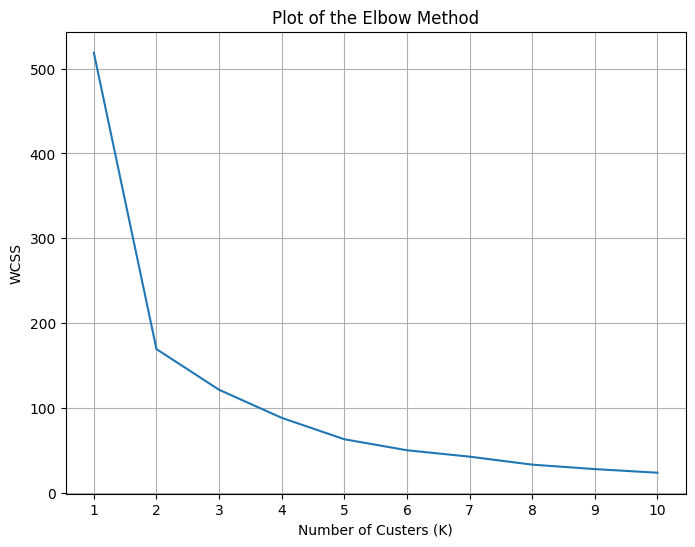

In [143]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS')
plt.grid()
plt.title('Plot of the Elbow Method')
plt.show()

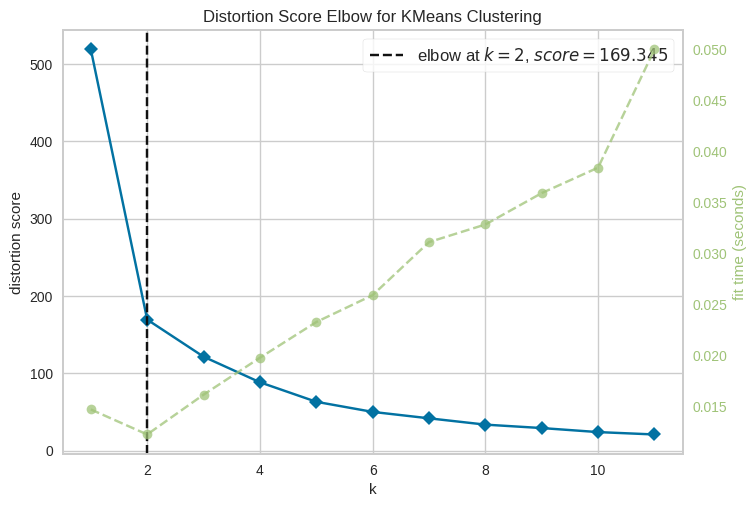

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [147]:
visualizer = KElbowVisualizer(KMeans(), k = (1,12))
visualizer.fit(df_pca)
visualizer.show()

In [148]:
# Kmeans Modeling

In [150]:
model = KMeans(n_clusters = 2, random_state= 42)
model.fit(df_pca)

KMeans(n_clusters=2, random_state=42)

In [151]:
print(model.labels_)

[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [152]:
df2["cluster_label"] = model.labels_

In [153]:
df_pca["Labels"] = model.labels_

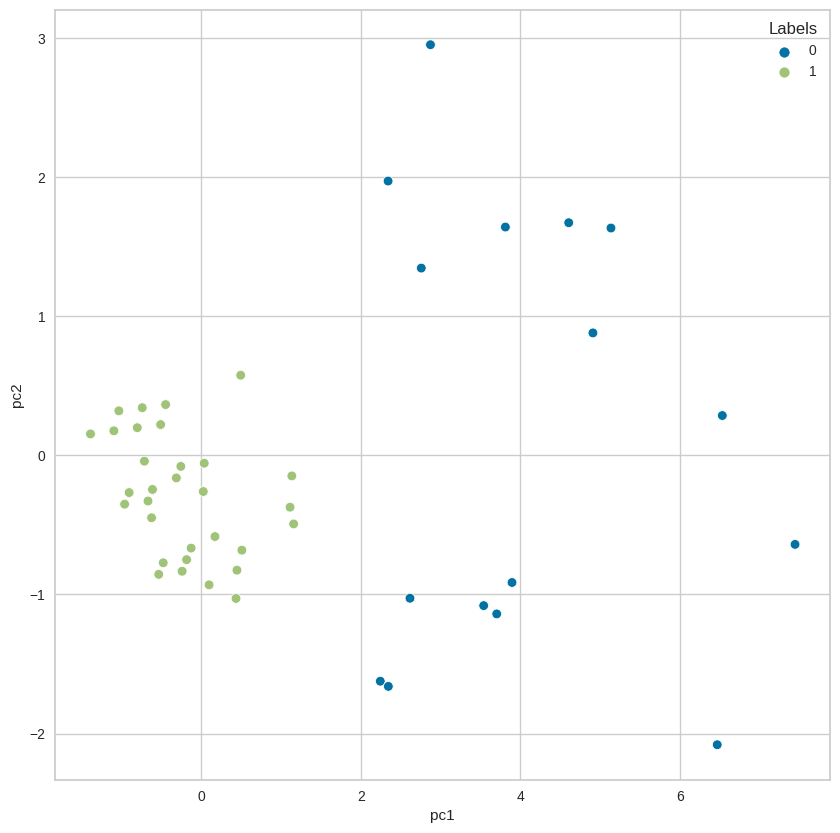

In [164]:
# Visualizing the clusters
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_pca["pc1"], y = df_pca["pc2"], hue = df_pca["Labels"] )
plt.show();

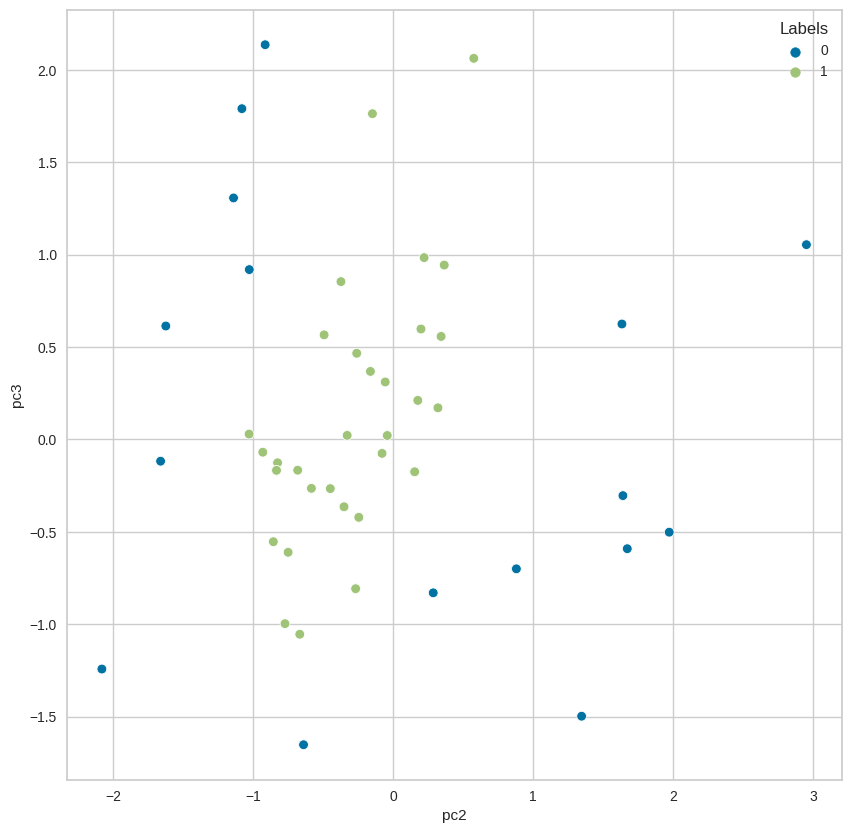

In [165]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_pca["pc2"], y = df_pca["pc3"], hue = df_pca["Labels"] )
plt.show();

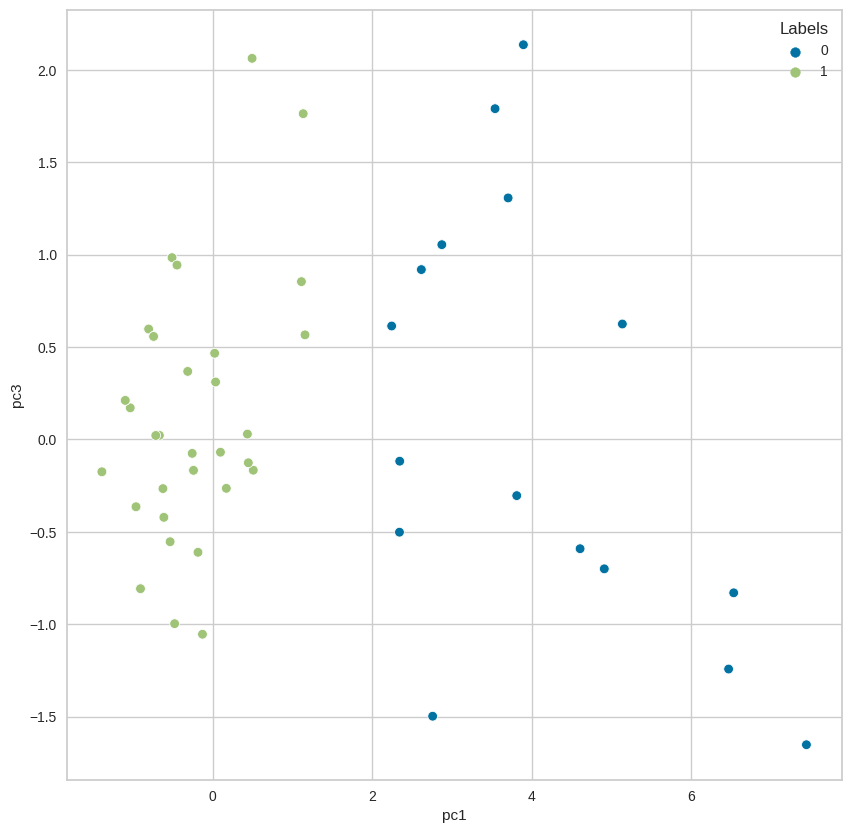

In [166]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_pca["pc1"], y = df_pca["pc3"], hue = df_pca["Labels"] )
plt.show();